In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import metrics
from sklearn.svm import SVR
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, scale

In [2]:
df = pd.read_csv("Automobile_data.csv")

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

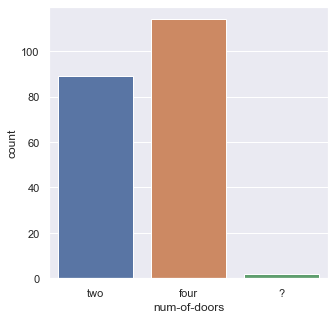

In [5]:
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = 'num-of-doors', data=df)
plt.show()

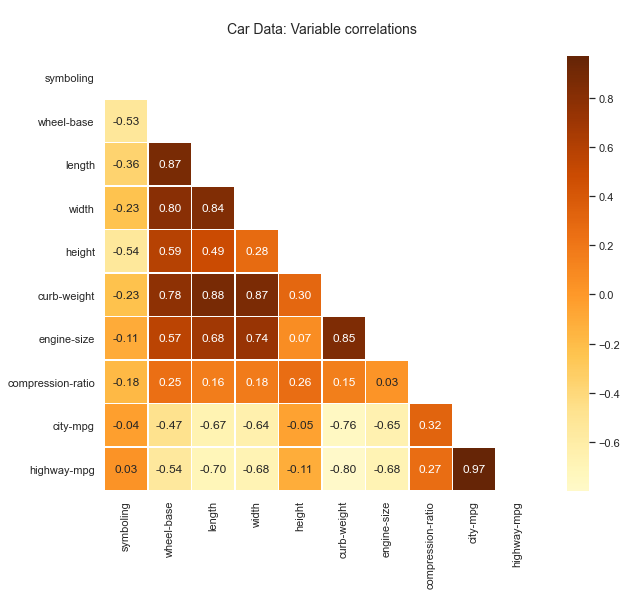

In [7]:
# check correlation between different variables
def corr_heat(df, title = None):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)
    matrix = df.corr()
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    with sns.axes_style("white"):
        sns.heatmap(matrix, mask=mask, annot=True, cmap="YlOrBr", square=True, fmt='.2f',linewidth=.6, center=0)
    if title: plt.title(f"\n{title}\n", fontsize=14)
    
corr_heat(df, "Car Data: Variable correlations" )

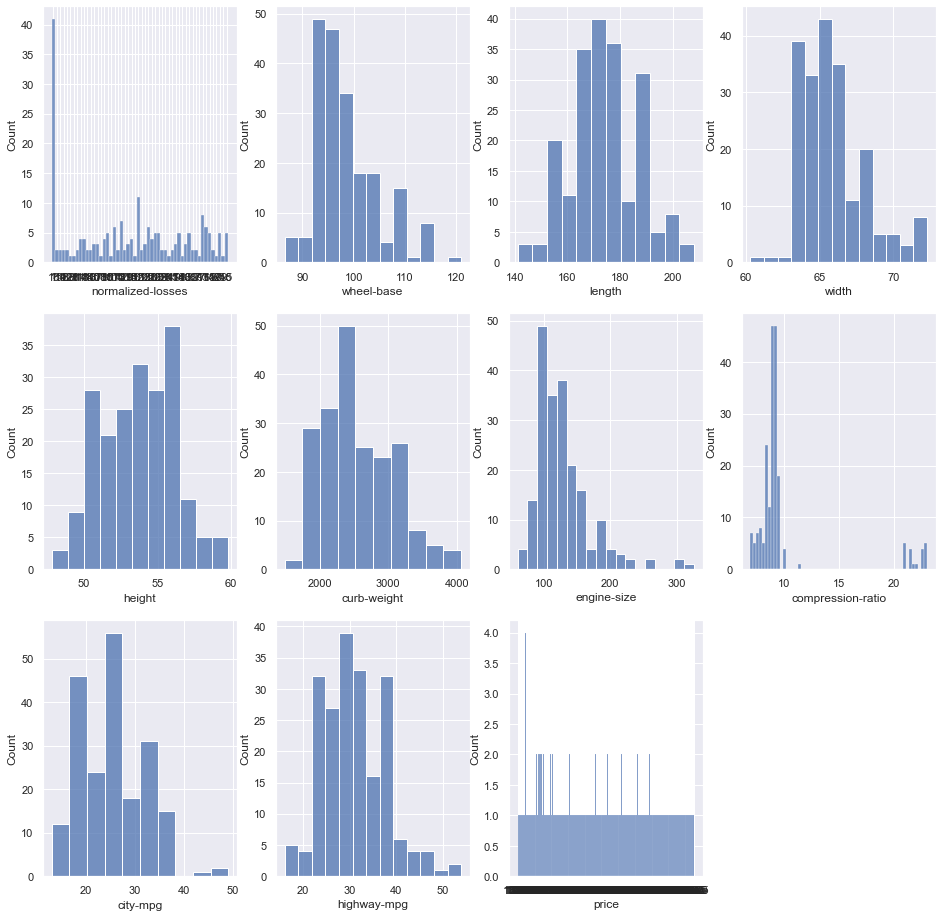

In [9]:
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
       'compression-ratio',  'city-mpg','highway-mpg', 'price']
# Check distributions of each numeric feature
plt.figure(figsize = (16, 16))
plotnumber = 1
for col in numeric_columns:
    ax = plt.subplot(3, 4, plotnumber)
    sns.histplot(df[col])
    plotnumber += 1
plt.show()

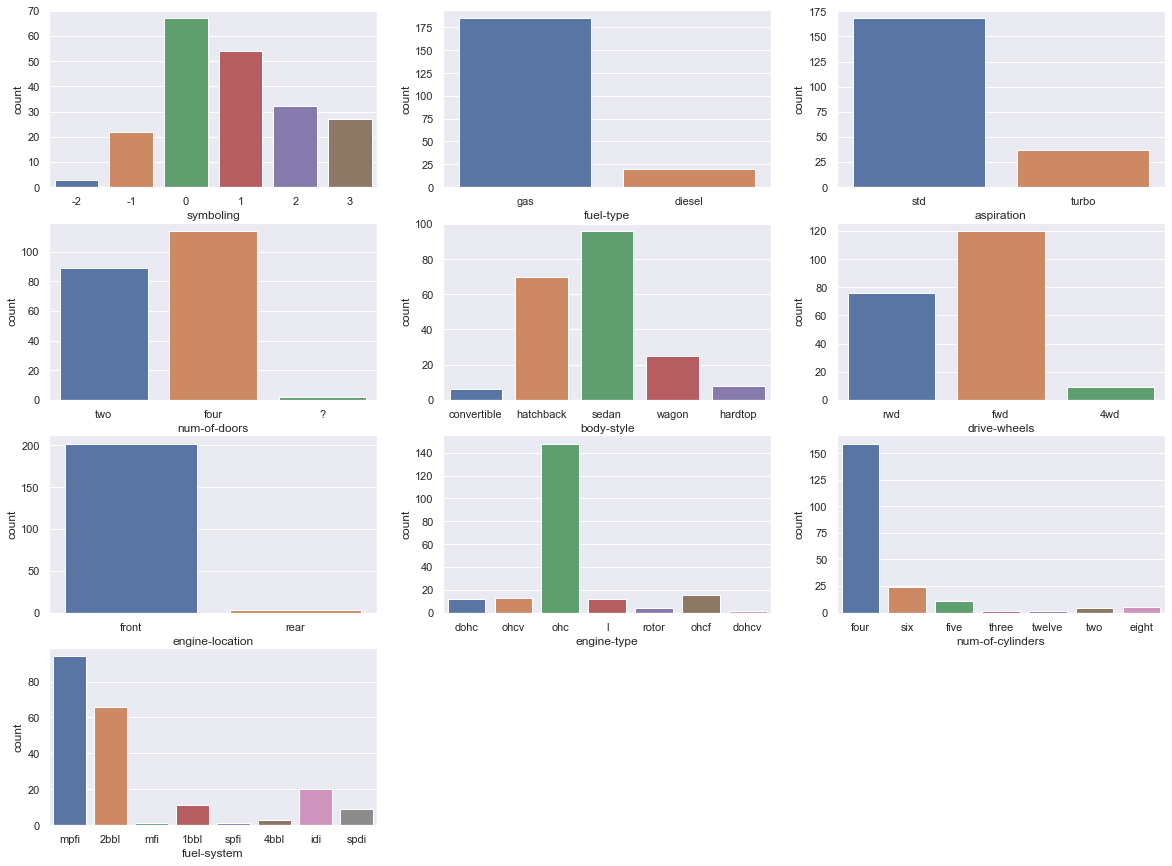

In [10]:
categorical_col = ['symboling', 'fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type',
       'num-of-cylinders','fuel-system']
plt.figure(figsize = (20,15))
plotnum = 1
for col in categorical_col:
    ax = plt.subplot(4, 3, plotnum)
    ax = sns.countplot(x= col, data=df)
    plotnum += 1

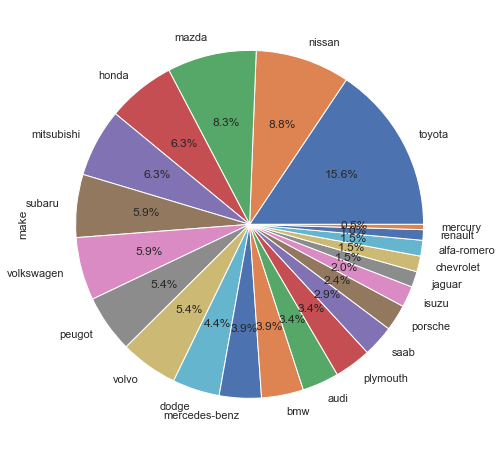

In [11]:
plt.figure(figsize=(10,8))
df['make'].value_counts().plot(kind='pie',autopct='%.1f%%')

plt.show()

In [12]:
df.drop(columns= "normalized-losses", axis=True)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [13]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [14]:
#Ratings range from -2 to 3 where -2 to 1 are rated as poor and 2 to 3 are rated as good
df['overall_rating'] = np.where(df['symboling']>1,1,0)
df['overall_rating'].value_counts()

0    146
1     59
Name: overall_rating, dtype: int64

In [15]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [16]:
#1 indicating gas and 0m indicating diesel
df['fuel-type'] = np.where(df['fuel-type']=='gas',1,0)
df['fuel-type'].value_counts()

1    185
0     20
Name: fuel-type, dtype: int64

In [17]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,overall_rating
0,3,?,alfa-romero,1,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1
1,3,?,alfa-romero,1,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
2,1,?,alfa-romero,1,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0
3,2,164,audi,1,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,1
4,2,164,audi,1,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,0
201,-1,95,volvo,1,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,0
202,-1,95,volvo,1,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,0
203,-1,95,volvo,0,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,0


In [18]:
df1=df.drop(['symboling', 'normalized-losses','num-of-doors','wheel-base', 'length','height','bore','stroke',
       'compression-ratio','peak-rpm','engine-location','aspiration','fuel-type','fuel-system'], axis=1)
df1.head()


,make,body-style,drive-wheels,width,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price,overall_rating
0,alfa-romero,convertible,rwd,64.1,2548,dohc,four,130,111,21,27,13495,1
1,alfa-romero,convertible,rwd,64.1,2548,dohc,four,130,111,21,27,16500,1
2,alfa-romero,hatchback,rwd,65.5,2823,ohcv,six,152,154,19,26,16500,0
3,audi,sedan,fwd,66.2,2337,ohc,four,109,102,24,30,13950,1
4,audi,sedan,4wd,66.4,2824,ohc,five,136,115,18,22,17450,1


In [19]:
data_dummy=pd.get_dummies(df1,columns=["body-style", "drive-wheels"], prefix=["body", "drive"])
data_dummy.head()

,make,width,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price,overall_rating,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,64.1,2548,dohc,four,130,111,21,27,13495,1,1,0,0,0,0,0,0,1
1,alfa-romero,64.1,2548,dohc,four,130,111,21,27,16500,1,1,0,0,0,0,0,0,1
2,alfa-romero,65.5,2823,ohcv,six,152,154,19,26,16500,0,0,0,1,0,0,0,0,1
3,audi,66.2,2337,ohc,four,109,102,24,30,13950,1,0,0,0,1,0,0,1,0
4,audi,66.4,2824,ohc,five,136,115,18,22,17450,1,0,0,0,1,0,1,0,0


In [20]:
data_dummy['ohc_code']=np.where(data_dummy['engine-type'].str.contains('ohc'),1,0)

#drop the engine-type variable
data3=data_dummy.drop('engine-type',axis=1)

In [97]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data3["make_code"] = ord_enc.fit_transform(data3[["make"]])

#drop the make variable
data_preprocessed=data3.drop('make',axis=1)
data_preprocessed = data_preprocessed[data_preprocessed['price']!='?'] 
data_preprocessed = data_preprocessed[data_preprocessed['horsepower']!='?']
data_preprocessed

,width,curb-weight,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price,overall_rating,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,ohc_code,make_code
0,64.1,2548,four,130,111,21,27,13495,1,1,0,0,0,0,0,0,1,1,0.0
1,64.1,2548,four,130,111,21,27,16500,1,1,0,0,0,0,0,0,1,1,0.0
2,65.5,2823,six,152,154,19,26,16500,0,0,0,1,0,0,0,0,1,1,0.0
3,66.2,2337,four,109,102,24,30,13950,1,0,0,0,1,0,0,1,0,1,1.0
4,66.4,2824,five,136,115,18,22,17450,1,0,0,0,1,0,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,68.9,2952,four,141,114,23,28,16845,0,0,0,0,1,0,0,0,1,1,21.0
201,68.8,3049,four,141,160,19,25,19045,0,0,0,0,1,0,0,0,1,1,21.0
202,68.9,3012,six,173,134,18,23,21485,0,0,0,0,1,0,0,0,1,1,21.0
203,68.9,3217,six,145,106,26,27,22470,0,0,0,0,1,0,0,0,1,1,21.0


In [98]:
encoder = LabelEncoder()
var_mod = ['num-of-cylinders']
for i in var_mod:
    data_preprocessed[i] = encoder.fit_transform(data_preprocessed[i])


In [100]:
Y = data_preprocessed[data_preprocessed['price']!= '?']
Y = Y[['price']].astype('int')
Y = np.log(Y)
Y

,price
0,9.510075
1,9.711116
2,9.711116
3,9.543235
4,9.767095
...,...
200,9.731809
201,9.854560
202,9.975110
203,10.019936


,width,curb-weight,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,overall_rating,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,ohc_code,make_code


In [101]:
target=Y['price']
inputs=data_preprocessed

In [102]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target, random_state = 42, test_size = 0.2)

In [103]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

In [125]:
print('Accuracy of Linear Regression on training set: {:.2f}'.format(linear.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'.format(linear.score(X_test, y_test)))
accuracy = mean_squared_error(y_test,linear_pred)
 
print(accuracy)
print(linear.score(X_train,y_train))
weights = linear.coef_
intercept = linear.intercept_
#print(weights,intercept)

Accuracy of Linear Regression on training set: 0.97
Accuracy of Linear Regression on test set: 0.96
0.015542963527516131
0.9712363600309717


In [117]:
Y1 = Y.astype('int')

X_train1, X_test1, y_train1, y_test1 = train_test_split(inputs,Y1, random_state = 0, test_size = 0.2)

In [121]:
logistic = LogisticRegression(solver = 'sag')
logistic.fit(X_train1, y_train1)
logistic_pred = logistic.predict(X_test1)

#Results
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logistic.score(X_train1, y_train1)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(logistic.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,logistic_pred)
 
print(accuracy)
 
weights = logistic.coef_
intercept = logistic.intercept_
#print(weights,intercept)

Accuracy of Logistic Regression on training set: 0.84
Accuracy of Logistic Regression on test set: 0.88
0.9907593725162581


In [126]:
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test1)

#Results
print('Accuracy of SVM Regression on training set: {:.2f}'.format(svr.score(X_train, y_train)))
print('Accuracy of SVM Regression on test set: {:.2f}'.format(svr.score(X_test, y_test)))
accuracy = mean_squared_error(y_test,svr_pred)
 
print(accuracy)
 

Accuracy of SVM Regression on training set: 0.98
Accuracy of SVM Regression on test set: 0.99
0.6627064110669763


In [127]:
#For price with integer values
svr = SVR()
svr.fit(X_train1, y_train1)
svr_pred = svr.predict(X_test1)

#Results
print('Accuracy of SVM Regression on training set: {:.2f}'.format(svr.score(X_train1, y_train1)))
print('Accuracy of SVM Regression on test set: {:.2f}'.format(svr.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,svr_pred)
 
print(accuracy)
 

Accuracy of SVM Regression on training set: 0.80
Accuracy of SVM Regression on test set: 0.80
1.1880474446004217


In [141]:
#price with int values
rforest = RandomForestRegressor(n_estimators=40)
rforest.fit(X_train1, y_train1)
rforest_pred = svr.predict(X_test1)

#Results
print('Accuracy of RandomForest Regression on training set: {:.2f}'.format(rforest.score(X_train1, y_train1)))
print('Accuracy of RandomForest Regression on test set: {:.2f}'.format(rforest.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,rforest_pred)
 
print(accuracy)
 

Accuracy of RandomForest Regression on training set: 1.00
Accuracy of RandomForest Regression on test set: 0.96
1.1880474446004217


In [160]:
rforest1 = RandomForestRegressor(n_estimators=10)
rforest1.fit(X_train, y_train)
rforest_pred1 = rforest1.predict(X_test)

#Results
print('Accuracy of RandomForest Regression on training set: {:.2f}'.format(rforest1.score(X_train, y_train)))
print('Accuracy of RandomForest Regression on test set: {:.2f}'.format(rforest1.score(X_test, y_test)))
accuracy = mean_squared_error(y_test,rforest_pred1)
 
print(accuracy)
 

Accuracy of RandomForest Regression on training set: 1.00
Accuracy of RandomForest Regression on test set: 0.99
0.002542930354496644


In [157]:
#Int values
adaboost = AdaBoostRegressor(n_estimators=15, learning_rate=0.5)
adaboost.fit(X_train1, y_train1)
adaboost_pred = adaboost.predict(X_test1)

#Results
print('Accuracy of Adaboost Regression on training set: {:.2f}'.format(adaboost.score(X_train1, y_train1)))
print('Accuracy of Adaboost Regression on test set: {:.2f}'.format(adaboost.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,adaboost_pred)
 
print(accuracy)
 

Accuracy of Adaboost Regression on training set: 1.00
Accuracy of Adaboost Regression on test set: 0.92
1.0694287622924192


In [166]:
adaboost1 = AdaBoostRegressor(n_estimators=15, learning_rate=0.1)
adaboost1.fit(X_train, y_train)
adaboost_pred1 = adaboost1.predict(X_test)

#Results
print('Accuracy of Adaboost Regression on training set: {:.2f}'.format(adaboost1.score(X_train, y_train)))
print('Accuracy of Adaboost Regression on test set: {:.2f}'.format(adaboost1.score(X_test, y_test)))
accuracy = mean_squared_error(y_test,adaboost_pred1)
 
print(accuracy)
 

Accuracy of Adaboost Regression on training set: 0.99
Accuracy of Adaboost Regression on test set: 0.99
0.003959356940374428


In [171]:
r2=linear.score(X_train,y_train)
n=X_train.shape[0]
p=X_train.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9673046394596657

In [172]:
r2=rforest.score(X_train,y_train)
n=X_train.shape[0]
p=X_train.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9992106591200508

In [173]:
r2=rforest1.score(X_train,y_train)
n=X_train.shape[0]
p=X_train.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9986213834481369

In [176]:
r2=svr.score(X_train,y_train)
n=X_train.shape[0]
p=X_train.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

-1.063910445730416

In [177]:
r2=adaboost.score(X_train,y_train)
n=X_train.shape[0]
p=X_train.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

-1.141421467104466

In [178]:
r2=adaboost1.score(X_train,y_train)
n=X_train.shape[0]
p=X_train.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9870680137597235

In [179]:
r2=logistic.score(X_train1,y_train1)
n=X_train1.shape[0]
p=X_train1.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8212750554273562

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_test)

#Results
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logistic.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(logistic.score(X_test, y_test)))
accuracy = mean_squared_error(y_test,logistic_pred)
 
print(accuracy)
 
weights = logistic.coef_
intercept = logistic.intercept_
#print(weights,intercept)

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

#Results
print('Accuracy of SVM Regression on training set: {:.2f}'.format(svr.score(X_train, y_train)))
print('Accuracy of SVM Regression on test set: {:.2f}'.format(svr.score(X_test, y_test)))
accuracy = mean_squared_error(y_test,svr_pred)
 
print(accuracy)
 